# Máquina Linear

$$F_{ind} = i l B$$
$$F_t = F_{ind}+F_{apl} = m a$$
$$e_{ind} = v B l$$
$$V_B = e_{ind} + i R$$

In [1]:
# Bibliotecas do python
import numpy as np # para arrays mais eficientes e várias funções matemáticas
import matplotlib.pyplot as plt # para fazer gráficos
import ipywidgets as wdgts # Para fazer partes interativas

In [2]:
# Função que faz vários gráficos de máquina linear
def maquinaLinear(VB = 200, Fapl = 0, R = 0.1, B = 0.2, l = 0.1, m = 0.497, T = 500, dt = 0.1):
    '''Produz os gráficos de tensão induzida, corrente no laço, velocidade e Força induzida e Potência.
    VB - Tensão da bateria em Volts
    Fapl - Força aplicada em N. Positiva no sentido do movimento.
    R - Resistência do laço em Ohms.
    B - Densidade do campo magnético em Tesla.
    l - distância entre os trilhos, em metros.
    m - Massa, em kilogramas.
    T - Período da simulação, em segundos.
    dt - Passo da simulação, em segundos.'''
    fig = plt.figure(figsize=(16, 6), dpi=80)
    v0 = 0
    dt = 0.1
    T = 500
    index = 0
    t0 = 0
    t = np.arange(t0,T+t0+dt,dt)
    eind = []
    i = []
    Find = []
    v = [v0]
    Pel = []
    Pmec = []
    while index*dt <= T:
        eind.append(v[index]*B*l)
        i.append((VB-eind[index])/R)
        Find.append(i[index]*l*B)
        Ft = Find[index]+Fapl
        a = Ft/m
        Pel.append(eind[index]*i[index])
        Pmec.append(Find[index]*v[index])
        v.append(v[index] + a * dt)
        index = index + 1
    v.pop()
    ax1 = fig.add_subplot(2,2,1)
    ax1b = ax1.twinx()
    ax2 = fig.add_subplot(2,2,3)
    ax2b = ax2.twinx()
    ax3 = fig.add_subplot(1,2,2)
    ax1.plot (t, eind, color="blue", lw=2)
    ax1b.plot (t, i, color="red", lw=2)
    ax1.set_ylabel("Tensão induzida [V] azul")
    ax1b.set_ylabel("Corrente [A] vermelho")
    ax2.plot (t, v, color="blue", lw=2)
    ax2b.plot (t, Find, color="red", lw=2)
    ax2.set_ylabel("Velocidade [m/s] azul")
    ax2b.set_ylabel("Força [N] vermelho")
    ax2.set_xlabel("Tempo [s]")
    ax3.plot(t,Pel, color="blue", lw=2)
    ax3.plot(t,Pmec, color="red", lw=2)
    ax3.set_ylabel("Potência [W]")
    ax3.set_xlabel("Tempo [s]")

In [3]:
# Gráfico com Sliders para vários parâmetros da máquina linear
VBw=wdgts.FloatSlider(min=0,max=400,value=200,description="Tensão da bateria")
Faplw=wdgts.FloatSlider(min=-1.0,max=1.0,value=0.0,description="Força aplicada")
Rw=wdgts.FloatSlider(min=0.1,max=10.0,value=0.1,description="Resistência")
Bw=wdgts.FloatSlider(min=0.1,max=50.0,value=0.2,description="Campo Magnético")
lw=wdgts.FloatSlider(min=0.01,max=1.0,value=0.1,description="Comprimento")
mw=wdgts.FloatSlider(min=0.1,max=10,value=0.497,description="Massa")
leftBox = wdgts.VBox([VBw,Faplw,Rw,Bw,lw,mw])
#leftBox
plots = wdgts.interactive(maquinaLinear,
              VB=VBw,
              Fapl=Faplw,
              R=Rw,
              B=Bw,
              l=lw,
              m=mw)
rightBox = wdgts.HBox([plots])
rightBox

In [7]:
# Função que faz vários gráficos até o comprimento de trilho dist
def maquinaLinear2(VB = 200, Fapl = 0, R = 0.1, B = 0.2, l = 0.1, m = 0.497,dist=2, dt = 0.001):
    '''Produz os gráficos de tensão induzida, corrente no laço, velocidade e Força induzida e Potência.
    VB - Tensão da bateria em Volts
    Fapl - Força aplicada em N. Positiva no sentido do movimento.
    R - Resistência do laço em Ohms.
    B - Densidade do campo magnético em Tesla.
    l - distância entre os trilhos, em metros.
    m - Massa, em kilogramas.
    dist - Comprimento do trilho, em metros.
    dt - Passo da simulação, em segundos.'''
    fig = plt.figure(figsize=(16, 6), dpi=80)
    v0 = 0
    dt = 0.001
    index = 0
    t0 = 0
    t=[t0]
#     t = np.arange(t0,T+t0+dt,dt)
    eind = []
    i = []
    Find = []
    v = [v0]
    x0 = 0
    x = [x0]
    Pel = []
    Pmec = []
    #while index*dt <= T:
    while x[-1] <= dist:
        eind.append(v[index]*B*l)
        i.append((VB-eind[index])/R)
        Find.append(i[index]*l*B)
        Ft = Find[index]+Fapl
        a = Ft/m
        Pel.append(eind[index]*i[index])
        Pmec.append(Find[index]*v[index])
        t.append(t[index]+dt)
        v.append(v[index] + a * dt)
        x.append(x[index] + v[index] * dt)
        index = index + 1
#         print(x[-1])
    t.pop()
    v.pop()
    x.pop()
    ax1 = fig.add_subplot(2,2,1)
    ax1b = ax1.twinx()
    ax2 = fig.add_subplot(2,2,3)
    ax2b = ax2.twinx()
    ax3 = fig.add_subplot(1,2,2)
    ax1.plot (t, eind, color="blue", lw=2)
    ax1b.plot (t, i, color="red", lw=2)
    ax1.set_ylabel("Tensão induzida [V] azul")
    ax1b.set_ylabel("Corrente [A] vermelho")
    ax2.plot (t, v, color="blue", lw=2)
    ax2b.plot (t, Find, color="red", lw=2)
    ax2.set_ylabel("Velocidade [m/s] azul")
    ax2b.set_ylabel("Força [N] vermelho")
    ax2.set_xlabel("Tempo [s]")
    ax3.plot(t,Pel, color="blue", lw=2)
    ax3.plot(t,Pmec, color="red", lw=2)
    ax3.set_ylabel("Potência [W]")
    ax3.set_xlabel("Tempo [s]")
    return {"t":t,"v":v,"Pel":Pel}

In [5]:
# Gráfico com Sliders para vários parâmetros da máquina linear
VBw=wdgts.FloatSlider(min=0,max=400,value=200,description="Tensão da bateria")
Faplw=wdgts.FloatSlider(min=-1.0,max=1.0,value=0.0,description="Força aplicada")
Rw=wdgts.FloatSlider(min=0.1,max=10.0,value=0.1,description="Resistência")
Bw=wdgts.FloatSlider(min=0.1,max=50.0,value=0.2,description="Campo Magnético")
lw=wdgts.FloatSlider(min=0.01,max=1.0,value=0.1,description="Comprimento")
mw=wdgts.FloatSlider(min=0.1,max=10,value=0.497,description="Massa")
leftBox = wdgts.VBox([VBw,Faplw,Rw,Bw,lw,mw])
#leftBox
plots = wdgts.interactive(maquinaLinear2,
              VB=VBw,
              Fapl=Faplw,
              R=Rw,
              B=Bw,
              l=lw,
              m=mw)
rightBox = wdgts.HBox([plots])
rightBox

[0.0,
 41579.968185774596,
 69038.55004676354,
 86084.99785157852,
 95537.87656081983,
 99530.62128941977,
 99670.560604238,
 97161.83754238767,
 92900.33348467872,
 87546.8908513384,
 81583.72402938745,
 75357.81453934648,
 69114.23660829676,
 63021.69889352316,
 57192.07497570618,
 51695.29664723172,
 46570.67447237972,
 41835.469767467715,
 37491.35562168647,
 33529.259862120154,
 29932.970634462486,
 26681.798273621152,
 23752.519738629668,
 21120.779701929867,
 18762.08200811481,
 16652.47400472377,
 14769.002141052733,
 13089.99863260114,
 11595.244658002495,
 10266.044528770155,
 9085.236802273968,
 8037.161814928285,
 7107.600145730343]

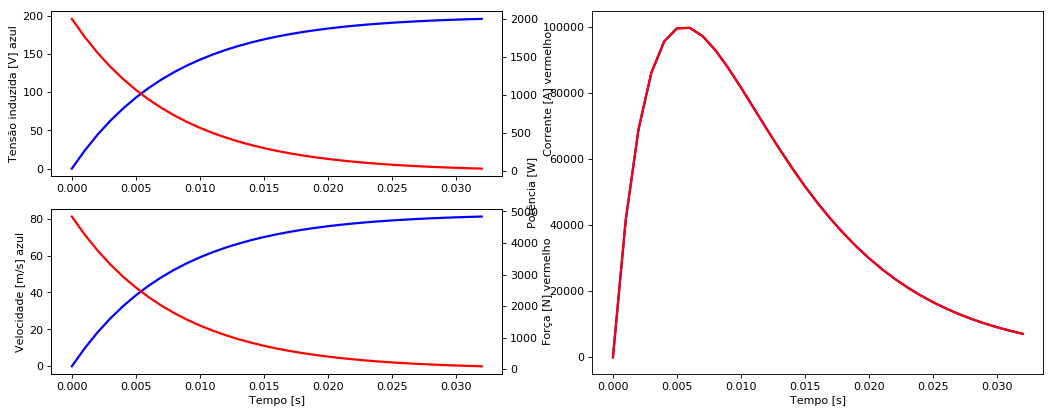

In [29]:
dados = maquinaLinear2(l=0.02,B=121)
dados["Pel"]

In [25]:
dados["Pel"]

[0.0,
 0.4057138742040816,
 0.8114265138792205,
 1.2171379190283387,
 1.6228480896543573,
 2.028557025760198,
 2.434264727348783,
 2.839971194423035,
 3.2456764269858733,
 3.6513804250402213,
 4.057083188589,
 4.462784717635131,
 4.868485012181536,
 5.274184072231138,
 5.679881897786856,
 6.085578488851614,
 6.491273845428333,
 6.8969679675199345,
 7.302660855129339,
 7.708352508259471,
 8.11404292691325,
 8.519732111093596,
 8.925420060803432,
 9.331106776045681,
 9.736792256823266,
 10.142476503139106,
 10.54815951499612,
 10.953841292397232,
 11.359521835345365,
 11.76520114384344,
 12.170879217894377,
 12.576556057501099,
 12.982231662666527,
 13.387906033393586,
 13.793579169685191,
 14.199251071544266,
 14.604921738973731,
 15.010591171976513,
 15.416259370555531,
 15.821926334713703,
 16.227592064453958,
 16.63325655977921,
 17.038919820692374,
 17.444581847196392,
 17.85024263929417,
 18.255902196988632,
 18.661560520282702,
 19.067217609179306,
 19.472873463681356,
 19.8785280

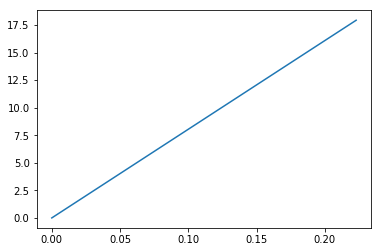

In [11]:
plt.plot(dados["t"],dados["v"])

In [13]:
dados["Pel"]

[0.0,
 3.2192899853851484,
 6.438502241643163,
 9.657636770233742,
 12.876693572616556,
 16.095672650251252,
 19.314574004597457,
 22.533397637114756,
 25.75214354926273,
 28.970811742500924,
 32.18940221828887,
 35.40791497808604,
 38.626350023351925,
 41.844707355545964,
 45.06298697612757,
 48.281188886556144,
 51.49931308829106,
 54.717359582791666,
 57.935328371517265,
 61.15321945592718,
 64.37103283748066,
 67.58876851763695,
 70.80642649785526,
 74.02400677959481,
 77.24150936431475,
 80.45893425347424,
 83.6762814485324,
 86.89355095094827,
 90.11074276218098,
 93.32785688368956,
 96.54489331693301,
 99.76185206337033,
 102.97873312446049,
 106.19553650166245,
 109.41226219643508,
 112.62891021023732,
 115.84548054452802,
 119.06197320076602,
 122.27838818041013,
 125.49472548491917,
 128.7109851157519,
 131.927167074367,
 135.14327136222323,
 138.3592979807793,
 141.57524693149387,
 144.79111821582555,
 148.006911835233,
 151.22262779117477,
 154.43826608510943,
 157.65382671

In [14]:
tabela = [dados["t"],dados["v"],dados["Pel"]]

In [15]:
tabela

[[0,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.006,
  0.007,
  0.008,
  0.009000000000000001,
  0.010000000000000002,
  0.011000000000000003,
  0.012000000000000004,
  0.013000000000000005,
  0.014000000000000005,
  0.015000000000000006,
  0.016000000000000007,
  0.017000000000000008,
  0.01800000000000001,
  0.01900000000000001,
  0.02000000000000001,
  0.02100000000000001,
  0.022000000000000013,
  0.023000000000000013,
  0.024000000000000014,
  0.025000000000000015,
  0.026000000000000016,
  0.027000000000000017,
  0.028000000000000018,
  0.02900000000000002,
  0.03000000000000002,
  0.03100000000000002,
  0.03200000000000002,
  0.03300000000000002,
  0.03400000000000002,
  0.035000000000000024,
  0.036000000000000025,
  0.037000000000000026,
  0.03800000000000003,
  0.03900000000000003,
  0.04000000000000003,
  0.04100000000000003,
  0.04200000000000003,
  0.04300000000000003,
  0.04400000000000003,
  0.04500000000000003,
  0.046000000000000034,
  0.047000000000000035,
  0.0